<a href="https://colab.research.google.com/github/katherinelynne/Python-Portfolio/blob/main/Project1_Product_and_Retail_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Product and Retail Data Analysis

**About the Data** The company is UK based and it is a non-store online retailer. They sell mainly occasion gifts. Most of the customers are wholesalesrs who are both local and international. The transactions in this data set are between the date ranges of 12/1/2010 - 12/9/2011


# Data Cleaning and Preparation

In [ ]:
#Below are the modules I will use for this data.

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns


import warnings
#The current version of seaborn generates a bunch of warnings that I'll ignore.
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

#Import missingmno and name it msno this is the # of missing data visualization module for Python

! pip install [https://github.com/pandas-profiling/pandas-profiling/archive/master.zip](https://github.com/pandas-profiling/pandas-profiling/archive/master.zip)


import gc

import datetime

%matplotlib inline
#Using ggplots style
plt.style.use('ggplot')

/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: ` pip install [https://github.com/pandas-profiling/pandas-profiling/archive/master.zip](https://github.com/pandas-profiling/pandas-profiling/archive/master.zip)'


In [ ]:
import pandas as pd

In [ ]:
from matplotlib.cbook import file_requires_unicode

# Loading our data
# Specifying encoding to deal with different formats

#df= pd.read.csv('./data/ecommerce/data.csv', encoding = 'ISO-8859-1')

# Download and unzip the file
from urllib.request import urlopen
from zipfile import ZipFile

zipurl='https://github.com/rajeevratan84/datascienceforbusiness/blob/master/ecommerce_data.zip?raw=true'
zipresp = urlopen(zipurl) #Create a new file on the harddrive
tempzip = open("/tmp/tempfile.zip", "wb") # Wite the contents of the downloaded file into the new file
tempzip.write(zipresp.read()) # Close the newly created file
tempzip.close() # re-open the newly-created file with ZipFile()
zf = ZipFile("/tmp/tempfile.zip") # Extracts its contents into <extraction_path>
zf.extractall(path = '') # note that extractall will automatically create the path, left blank so its in working directory
# Close the ZipFile instance
zf.close()

df = pd.read_csv("ecommerce_data.csv", encoding='ISO-8859-1')

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
# Check the info to make sure everything is correct
# I find that InvoiceDate is an object and I want that to be a time data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
# Check the missing values for each column
df.isnull().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64

In [ ]:
# Checking the rows with missing values
df[df.isnull().any(axis=1)].head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,12/1/2010 14:32,1.66,NaN,United Kingdom
1448,536544,21791,VINTAGE HEADS AND TAILS CARD GAME,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1449,536544,21801,CHRISTMAS TREE DECORATION WITH BELL,10,12/1/2010 14:32,0.43,NaN,United Kingdom
1450,536544,21802,CHRISTMAS TREE HEART DECORATION,9,12/1/2010 14:32,0.43,NaN,United Kingdom
1451,536544,21803,CHRISTMAS TREE STAR DECORATION,11,12/1/2010 14:32,0.43,NaN,United Kingdom


In [ ]:
# Change the invoice_date format - String to timestamp format
df['InvoiceDate'] = pd.to_datetime(df.InvoiceDate, format='%m/%d/%Y %H:%M')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
# Now lets do Time series operations
# df_new without missing values
df_no_missing = df.dropna()

In [ ]:
# Check missing values for each column
df_no_missing.isnull().sum().sort_values(ascending=False)

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
# Convert String to Int type because Customer ID doesnt need to be a float
df_no_missing['CustomerID'] = df_no_missing['CustomerID'].astype('int64')
df_no_missing.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [ ]:
# Rename the dataframs to make code more readable
df2 = df_no_missing.copy()
df2.describe().round(2)

,Quantity,UnitPrice,CustomerID
count,406829.00,406829.00,406829.00
mean,12.06,3.46,15287.69
std,248.69,69.32,1713.60
min,-80995.00,0.00,12346.00
25%,2.00,1.25,13953.00
50%,5.00,1.95,15152.00
75%,12.00,3.75,16791.00
max,80995.00,38970.00,18287.00


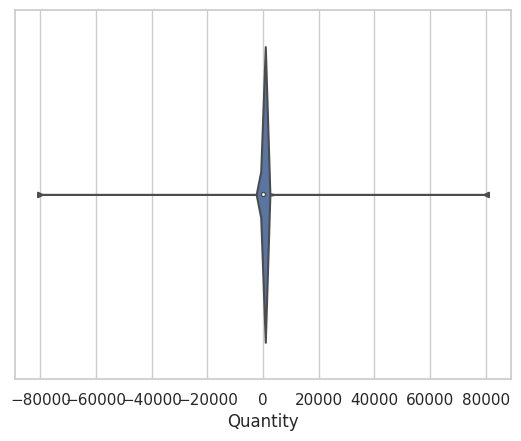

In [ ]:
# violin plot for quantities
sns.set(style="whitegrid")
ax = sns.violinplot(x=df2["Quantity"])

We can see all of the data is centered in the middle but there are peaks on either side so maybe we can remove the negative values from the left side.

In [ ]:
# Remove negative quantities

df2 = df2[df2.Quantity > 0]
df2.describe().round(2)

,Quantity,UnitPrice,CustomerID
count,397924.00,397924.00,397924.00
mean,13.02,3.12,15294.32
std,180.42,22.10,1713.17
min,1.00,0.00,12346.00
25%,2.00,1.25,13969.00
50%,6.00,1.95,15159.00
75%,12.00,3.75,16795.00
max,80995.00,8142.75,18287.00


Now we see 1 as expected and there are no negative values. But lets double check with the violin plots.

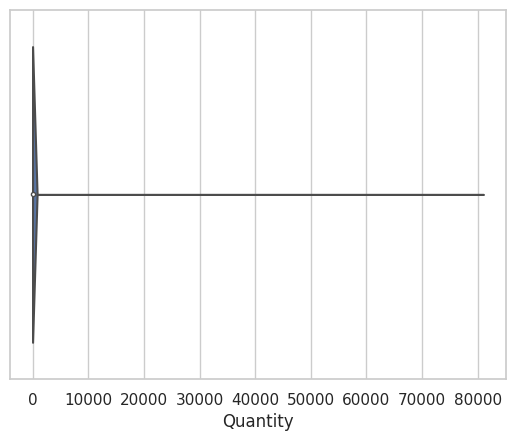

In [ ]:
ax = sns.violinplot(x=df2["Quantity"])

In [ ]:
# Lets work out the amounts by creating a new column called "amount spent" and it multiplies unit price by quantitity.
df2['AmountSpent'] = df2['Quantity'] * df2['UnitPrice']
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [ ]:
# Adding Month Day and Hour columns that we will use for further analysis
# Starting with Year_Month first
# Take Invoice Date and extract the month and create a new field  
df2['Year_Month'] = df2['InvoiceDate'].dt.to_period('M')
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,Year_Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12


In [ ]:
# Re-create new columns for the below. We're going to see some analysis on how much things have sold per month, day of week etc. so We need to create L first.
# Below is getting the invoice date for each item below.
# Run L through the below loop and then join it back together. 

L = ['year', 'month', 'day', 'dayofweek', 'dayofyear', 'weekofyear', 'quarter']
df2 = df2.join(pd.concat((getattr(df2['InvoiceDate'].dt, i).rename(i) for i in L), axis=1))
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,Year_Month,year,month,day,dayofweek,dayofyear,weekofyear,quarter
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12,2010,12,1,2,335,48,4
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,2,335,48,4
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12,2010,12,1,2,335,48,4
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,2,335,48,4
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,2,335,48,4


In [ ]:
df2.dayofweek.unique()

array([2, 3, 4, 6, 0, 1])

We can see above that day of week starts with 0 so Sunday is 0 and we will fix that later on. For now, lets check our data types.

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  int64         
 7   Country      397924 non-null  object        
 8   AmountSpent  397924 non-null  float64       
 9   Year_Month   397924 non-null  period[M]     
 10  year         397924 non-null  int64         
 11  month        397924 non-null  int64         
 12  day          397924 non-null  int64         
 13  dayofweek    397924 non-null  int64         
 14  dayofyear    397924 non-null  int64         
 15  weekofyear   397924 non-null  int6

In [ ]:
# Now add 1 to each day of the week so Sunday can be 1
df2['dayofweek'] = df2['dayofweek'] + 1
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,Year_Month,year,month,day,dayofweek,dayofyear,weekofyear,quarter
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12,2010,12,1,3,335,48,4
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,335,48,4
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12,2010,12,1,3,335,48,4
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,335,48,4
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,335,48,4


# Exploring and Analyzing the Data

In [ ]:
# Consolidating the number of Sales made per customer for each country
# We use InvoiceNo as the count for Sales
# We take our DF and group by customer ID and country, and we dont want to use the index, then we count invoice number
# which counts as a sale and ascending=false will ensure the highest values appear first.
sales_per_cust = df2.groupby(by=['CustomerID', 'Country'], as_index=False)['InvoiceNo'].count().sort_values(by='InvoiceNo', ascending=False)
sales_per_cust.columns = ['CustomerID', 'Country', "NumberofSales"]
sales_per_cust.head(10)

,CustomerID,Country,NumberofSales
4019,17841,United Kingdom,7847
1888,14911,EIRE,5677
1298,14096,United Kingdom,5111
334,12748,United Kingdom,4596
1670,14606,United Kingdom,2700
2185,15311,United Kingdom,2379
1698,14646,Netherlands,2080
570,13089,United Kingdom,1818
699,13263,United Kingdom,1677
1443,14298,United Kingdom,1637


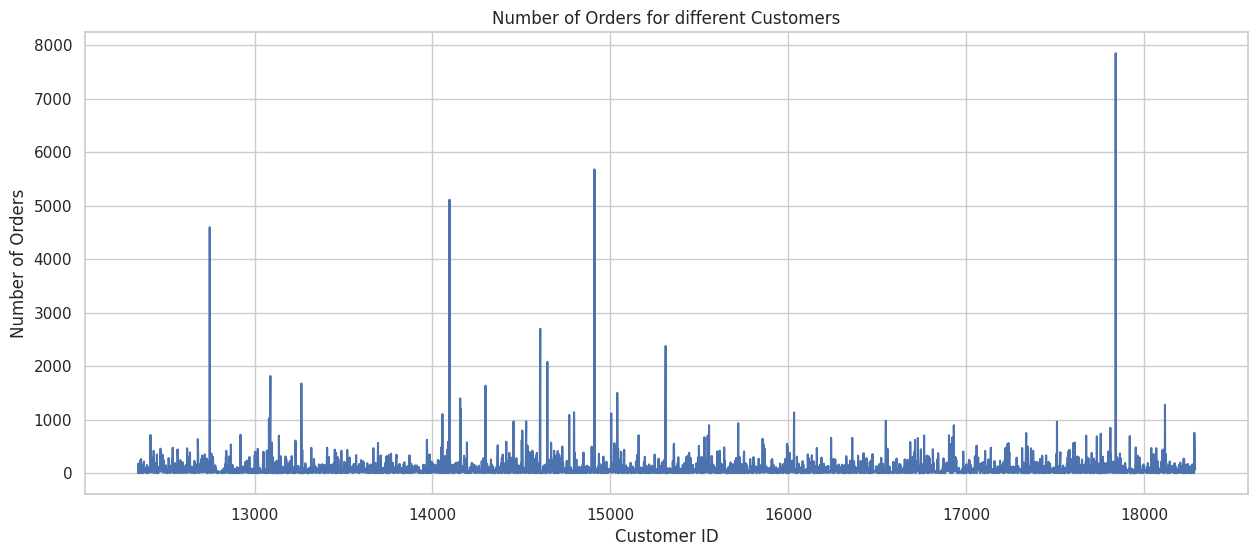

In [ ]:
# Visualizing number of sales for all customers

orders = df2.groupby(by=['CustomerID', 'Country'], as_index=False)['InvoiceNo'].count()

plt.subplots(figsize=(15,6))
plt.plot(orders.CustomerID, orders.InvoiceNo)
plt.xlabel('Customer ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for different Customers')
plt.show()

Who are these people, who are the best customers? We can see these customers rank in height compared to other in terms of volume of sales. Volume of sales or number isnt the best way to look at this, we may want to see the amount spent per customer.

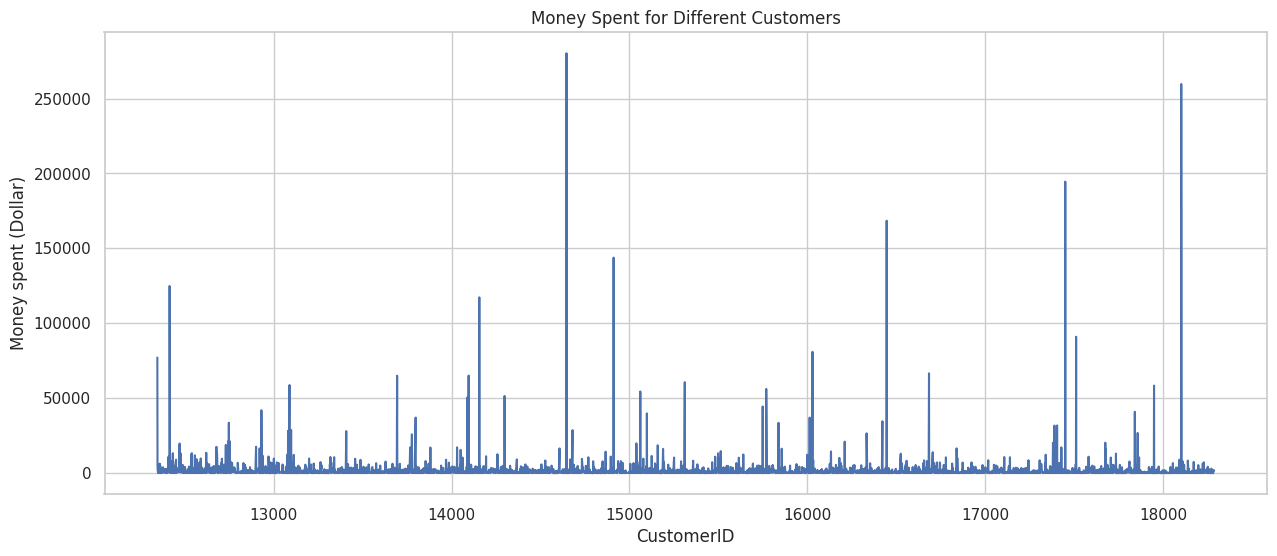

In [ ]:
# Visualizing money spent for all customers
money_spent = df2.groupby(by=['CustomerID', 'Country'], as_index=False)['AmountSpent'].sum()

plt.subplots(figsize=(15,6))
plt.plot(money_spent.CustomerID, money_spent.AmountSpent)
plt.xlabel('CustomerID')
plt.ylabel('Money spent (Dollar)')
plt.title('Money Spent for Different Customers')
plt.show()

In [ ]:
# Consolidate the number of sales made per customer (Revenue)
# We use index=False to indicate the groupby that we dont want to set the customer ID as index
# Here, we can see how much money the highest spending customers actually spent overall
spent_per_cust = df2.groupby(by=['CustomerID', 'Country'], as_index=False)['AmountSpent'].sum().sort_values(by='AmountSpent', ascending=False)
spent_per_cust.columns = ['CustomerID', 'Country', "TotalSpent"]
spent_per_cust.head(10)

,CustomerID,Country,TotalSpent
1698,14646,Netherlands,280206.02
4210,18102,United Kingdom,259657.30
3737,17450,United Kingdom,194550.79
3017,16446,United Kingdom,168472.50
1888,14911,EIRE,143825.06
57,12415,Australia,124914.53
1342,14156,EIRE,117379.63
3780,17511,United Kingdom,91062.38
2711,16029,United Kingdom,81024.84
0,12346,United Kingdom,77183.60


# Purchasing Patterns

In [ ]:
# Check our data and make sure evetything is okay
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,Year_Month,year,month,day,dayofweek,dayofyear,weekofyear,quarter
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12,2010,12,1,3,335,48,4
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,335,48,4
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12,2010,12,1,3,335,48,4
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,335,48,4
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,335,48,4


In [ ]:
# Insert a new column as out 3rd row (index 2) with year_month by joining our yea with month from our InvoiceDate field
# We take the year and multiply by 100 to get a 2010 format plus the month and because it acts like a string data type here it appends each other opposed to actually adding 12 to 2,010
df2.insert(loc=2, column= 'year_month', value=df2['InvoiceDate'].map(lambda x: 100*x.year + x.month))

# Insert a new column as our 6th column (index 5) with our Hour extracted from InvoiceDate
df2.insert(loc=5, column='hour', value=df2.InvoiceDate.dt.hour)

In [ ]:
# Check to see if our year_month and hour columns were made
df2.head()

,InvoiceNo,StockCode,year_month,Description,Quantity,hour,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,Year_Month,year,month,day,dayofweek,dayofyear,weekofyear,quarter
0,536365,85123A,201012,WHITE HANGING HEART T-LIGHT HOLDER,6,8,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12,2010,12,1,3,335,48,4
1,536365,71053,201012,WHITE METAL LANTERN,6,8,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,335,48,4
2,536365,84406B,201012,CREAM CUPID HEARTS COAT HANGER,8,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12,2010,12,1,3,335,48,4
3,536365,84029G,201012,KNITTED UNION FLAG HOT WATER BOTTLE,6,8,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,335,48,4
4,536365,84029E,201012,RED WOOLLY HOTTIE WHITE HEART.,6,8,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,335,48,4


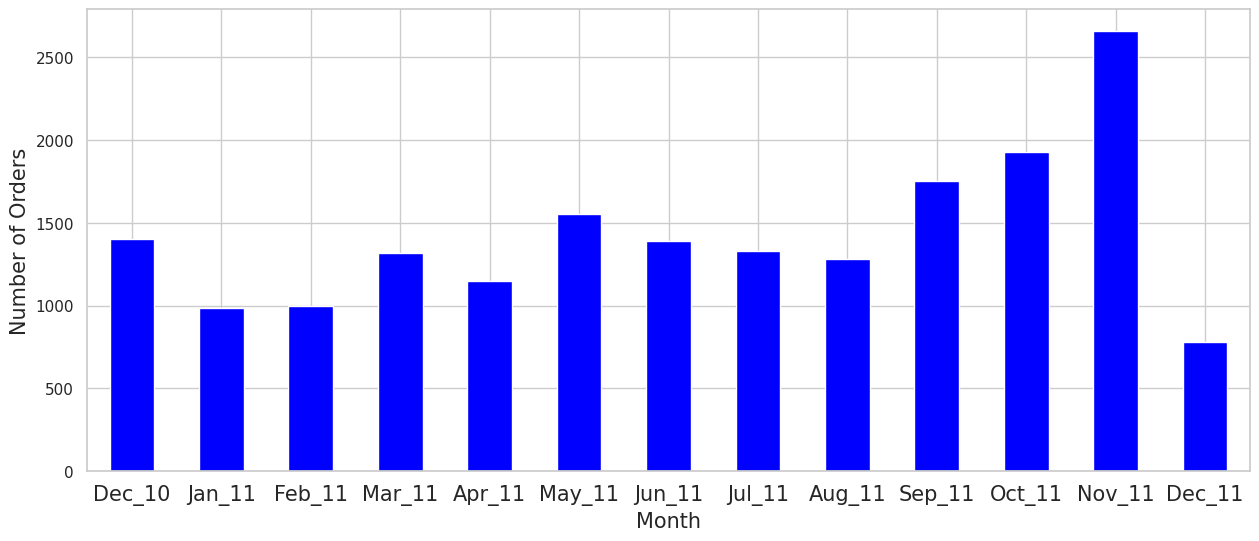

In [ ]:
# Create a plot that shows the number of orders per month
# We group by invoiceNo because that is how we will count the number of orders, doesnt matter how many items are on the invoice, one invoice = one number.
# We group by year month and get the distinct counts
import seaborn as sns
ax = df2.groupby('InvoiceNo')['year_month'].unique().value_counts().sort_index().plot(kind='bar', color='blue', figsize=(15,6))
ax.set_xlabel('Month', fontsize=15)
ax.set_ylabel('Number of Orders', fontsize=15)
ax.set_xticklabels(('Dec_10', 'Jan_11', 'Feb_11', 'Mar_11','Apr_11','May_11','Jun_11','Jul_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation='horizontal',fontsize=15)
plt.show()


In [ ]:
# Let's see number of orders per day of the week, this tells us the the 4th day of the week has the highest
df2.groupby('InvoiceNo')['dayofweek'].unique().value_counts().sort_index()

[1]    2863
[2]    3185
[3]    3455
[4]    4033
[5]    2831
[7]    2169
Name: dayofweek, dtype: int64

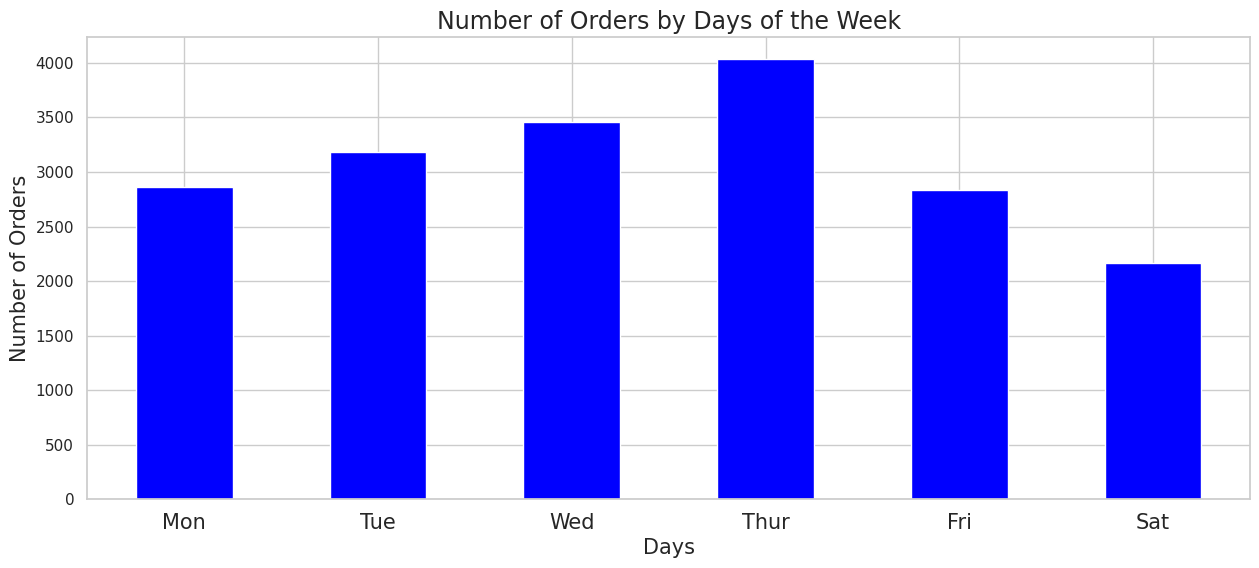

In [ ]:
# Create a plot for the number of order per day of the week
ax = df2.groupby('InvoiceNo')['dayofweek'].unique().value_counts().sort_index().plot(kind='bar', color='blue', figsize=(15,6))
ax.set_xlabel('Days',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title("Number of Orders by Days of the Week",fontsize=17)
ax.set_xticklabels(('Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat'), rotation='horizontal',fontsize=15)
plt.show()

In [ ]:
df2.columns

Index(['InvoiceNo', 'StockCode', 'year_month', 'Description', 'Quantity',
       'hour', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country',
       'AmountSpent', 'Year_Month', 'year', 'month', 'day', 'dayofweek',
       'dayofyear', 'weekofyear', 'quarter'],
      dtype='object')

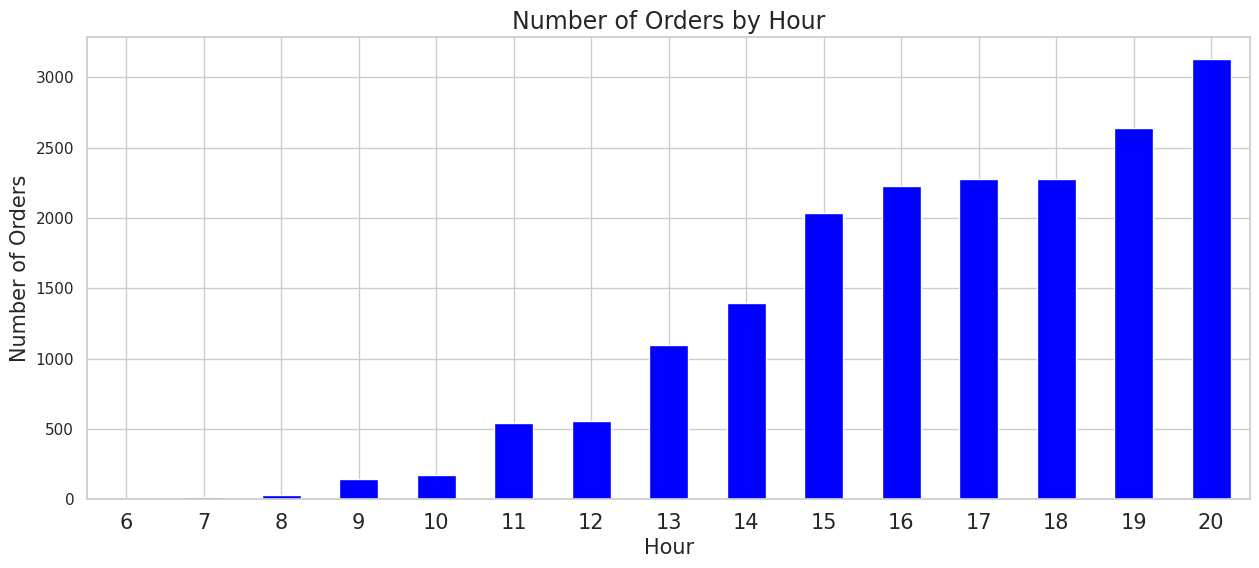

In [ ]:
# Plotting the number of orders per hour (using our newly created 'hour' column)
# This could be useful for a team who wants to know when a support analyst would be most needed at which points in the day
ax = df2.groupby('InvoiceNo')['hour'].unique().value_counts().iloc[:-1].sort_values().plot(kind='bar', color='blue', figsize=(15,6))
ax.set_xlabel('Hour',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of Orders by Hour',fontsize=17)
ax.set_xticklabels(range(6, 21), rotation='horizontal', fontsize=15)
plt.show()

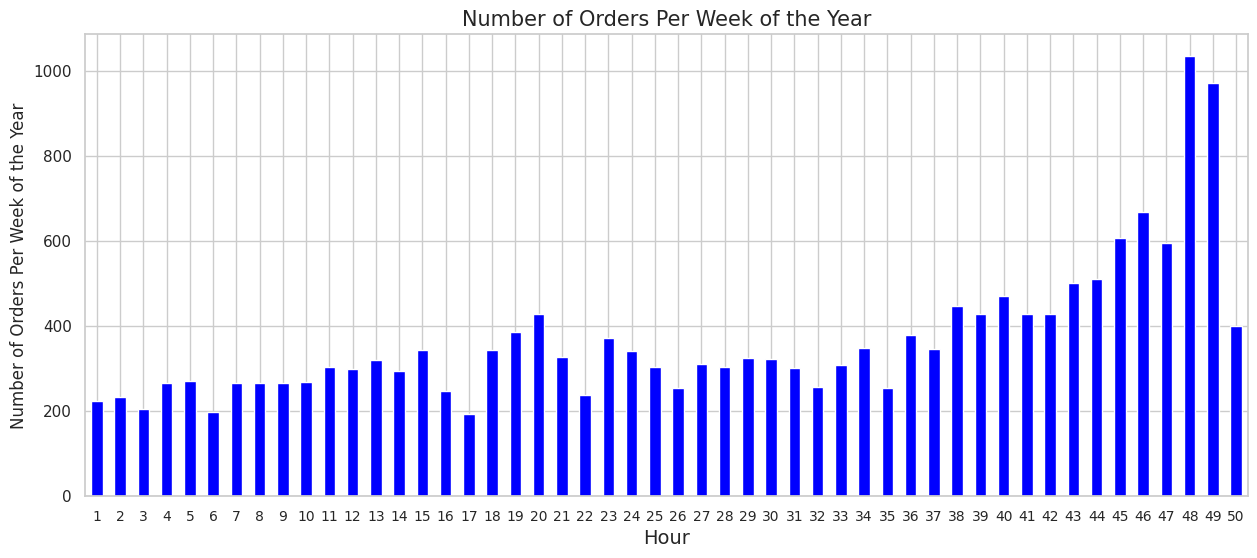

In [ ]:
# Number of sales per week of the year
ax = df2.groupby('InvoiceNo')['weekofyear'].unique().value_counts().iloc[:-1].sort_index().plot(kind='bar', color='blue', figsize=(15,6))
ax.set_xlabel('Hour',fontsize=14)
ax.set_ylabel('Number of Orders Per Week of the Year',fontsize=12)
ax.set_title('Number of Orders Per Week of the Year',fontsize=15)
ax.set_xticklabels(range(1, 51), rotation='horizontal', fontsize=10)
plt.show()

Analyze Unit Prices of our Items

In [ ]:
df2.UnitPrice.describe()

count    397924.000000
mean          3.116174
std          22.096788
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: UnitPrice, dtype: float64

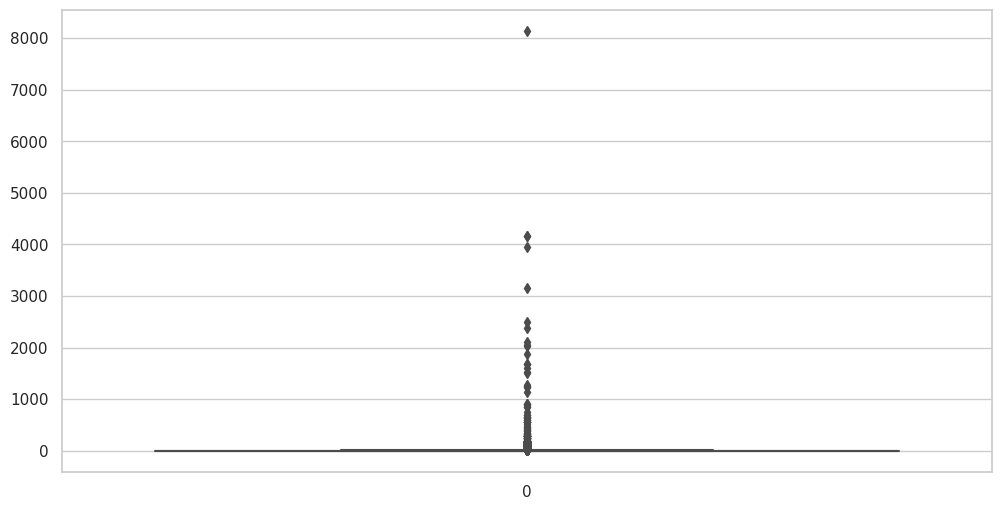

In [ ]:
# Check the distribution of unit price
plt.subplots(figsize=(12,6))
sns.boxplot(df2.UnitPrice)
plt.show()

In [ ]:
# We know there are some free items so lets see those
df_free_items = df2[df2.UnitPrice == 0]
print(len(df_free_items))
df_free_items.head()

40


,InvoiceNo,StockCode,year_month,Description,Quantity,hour,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,Year_Month,year,month,day,dayofweek,dayofyear,weekofyear,quarter
9302,537197,22841,201012,ROUND CAKE TIN VINTAGE GREEN,1,14,2010-12-05 14:02:00,0.0,12647,Germany,0.0,2010-12,2010,12,5,7,339,48,4
33576,539263,22580,201012,ADVENT CALENDAR GINGHAM SACK,4,14,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0,2010-12,2010,12,16,4,350,50,4
40089,539722,22423,201012,REGENCY CAKESTAND 3 TIER,10,13,2010-12-21 13:45:00,0.0,14911,EIRE,0.0,2010-12,2010,12,21,2,355,51,4
47068,540372,22090,201101,PAPER BUNTING RETROSPOT,24,16,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0,2011-01,2011,1,6,4,6,1,1
47070,540372,22553,201101,PLASTERS IN TIN SKULLS,24,16,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0,2011-01,2011,1,6,4,6,1,1


In [ ]:
# See when these items were given out
df_free_items.year_month.value_counts().sort_index()

201012     3
201101     3
201102     1
201103     2
201104     2
201105     2
201107     2
201108     6
201109     2
201110     3
201111    14
Name: year_month, dtype: int64

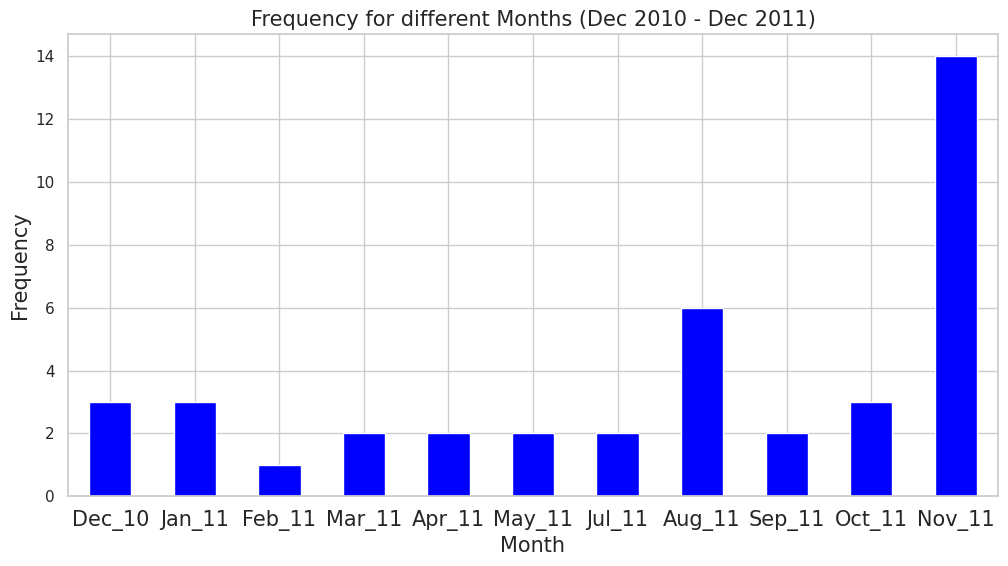

In [ ]:
# Plotting the above
ax = df_free_items.year_month.value_counts().sort_index().plot(kind='bar',figsize=(12,6), color='blue')
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Frequency',fontsize=15)
ax.set_title('Frequency for different Months (Dec 2010 - Dec 2011)', fontsize=15)
ax.set_xticklabels(('Dec_10', 'Jan_11', 'Feb_11', 'Mar_11','Apr_11','May_11','Jul_11','Aug_11','Sep_11','Oct_11','Nov_11'), rotation='horizontal',fontsize=15)
plt.show()

On average, the company gave out 2-4 times FREE items to customers each month (Except in June2011)

# Analysis Per Country

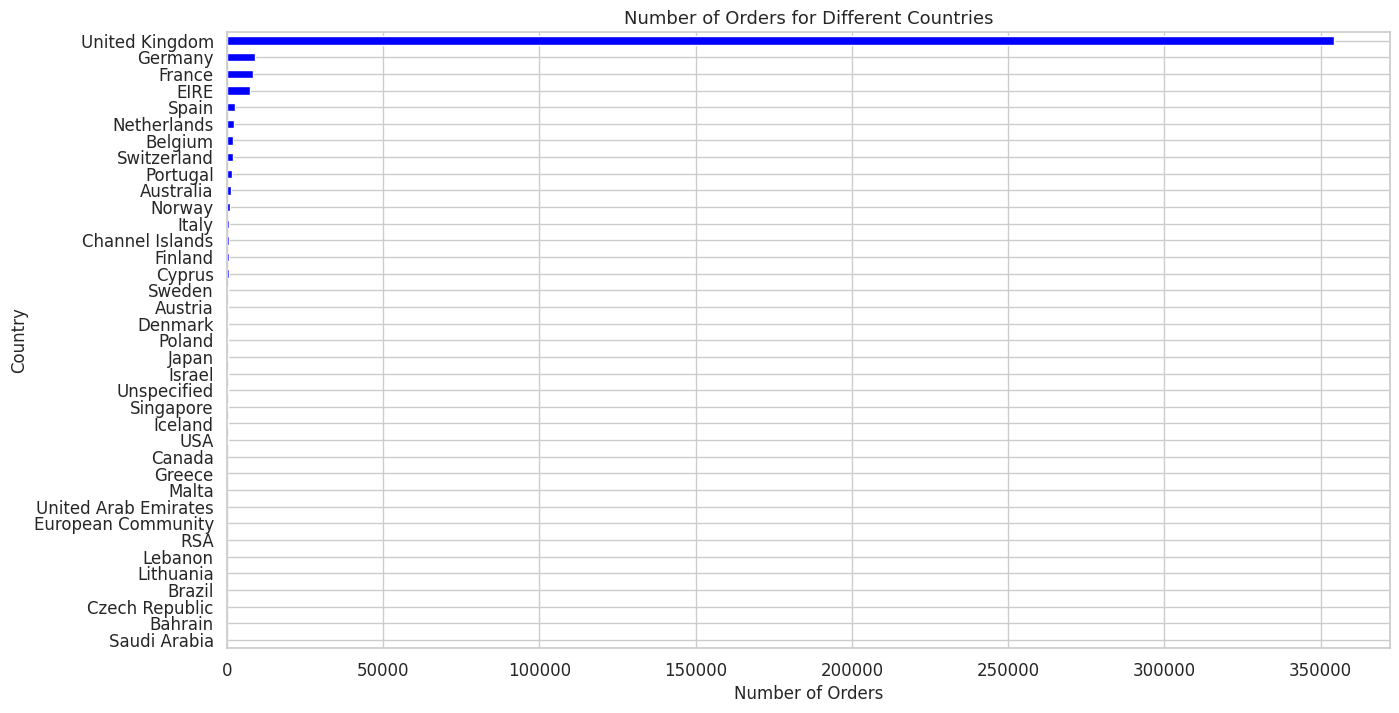

In [ ]:
group_country_orders = df2.groupby('Country')['InvoiceDate'].count().sort_values()

# Plot number of distinct customers in each country (with UK)
plt.subplots(figsize=(15,8))
group_country_orders.plot(kind='barh',fontsize=12, color='blue')
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country',fontsize=12)
plt.title('Number of Orders for Different Countries',fontsize=13)
plt.show()

So above, we cant visually see how other countires are performing so I will exclude the UK from the chart just to get a better idea of how the other countires compare.

In [ ]:
# Exclude the UK to see how other cousntires compare

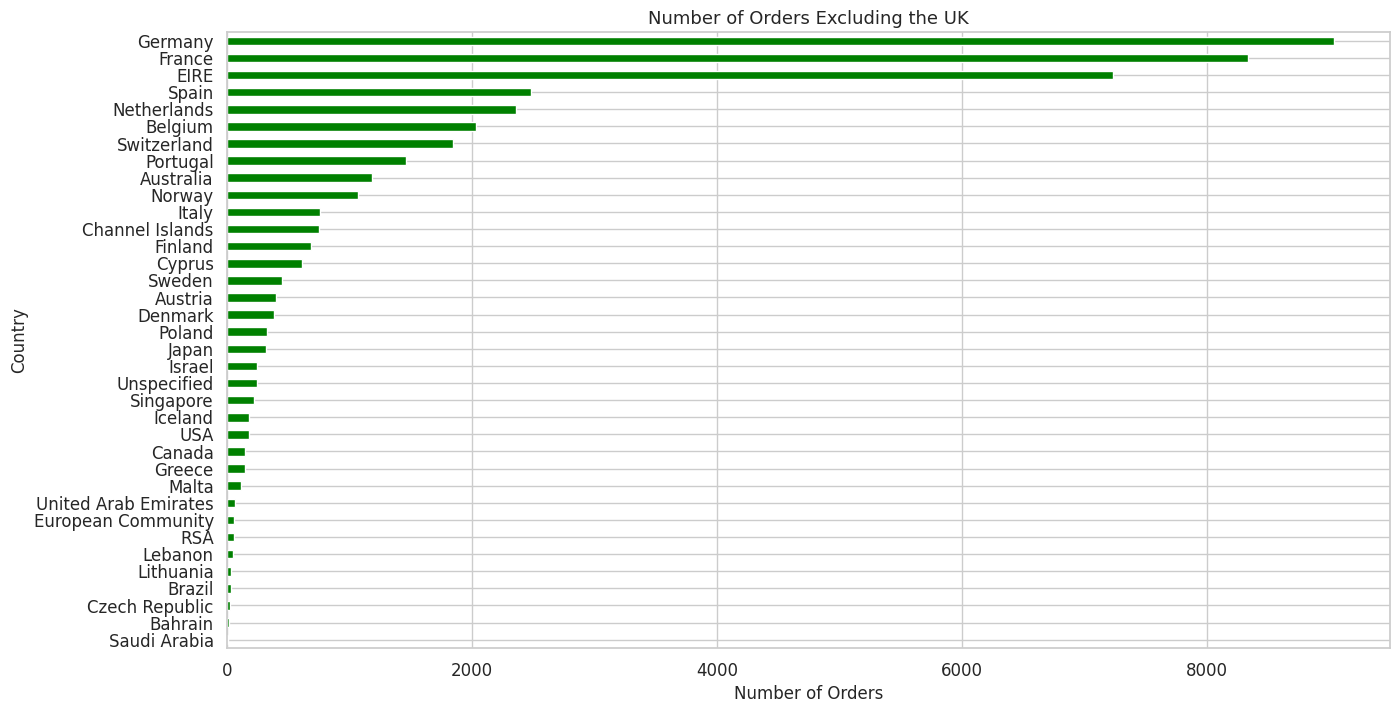

In [ ]:
group_country_orders = df2.groupby('Country')['InvoiceDate'].count().sort_values()
group_country_orders_without_uk = group_country_orders.copy()
del group_country_orders_without_uk['United Kingdom']

#plot number of unique customers in each cpuntry without the UK
plt.subplots(figsize=(15,8))
group_country_orders_without_uk.plot(kind='barh',fontsize=12, color='green')
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders Excluding the UK',fontsize=13)
plt.show()

Germany and France are quite large.

Text(0.5, 1.0, 'Amount Spent per Country')

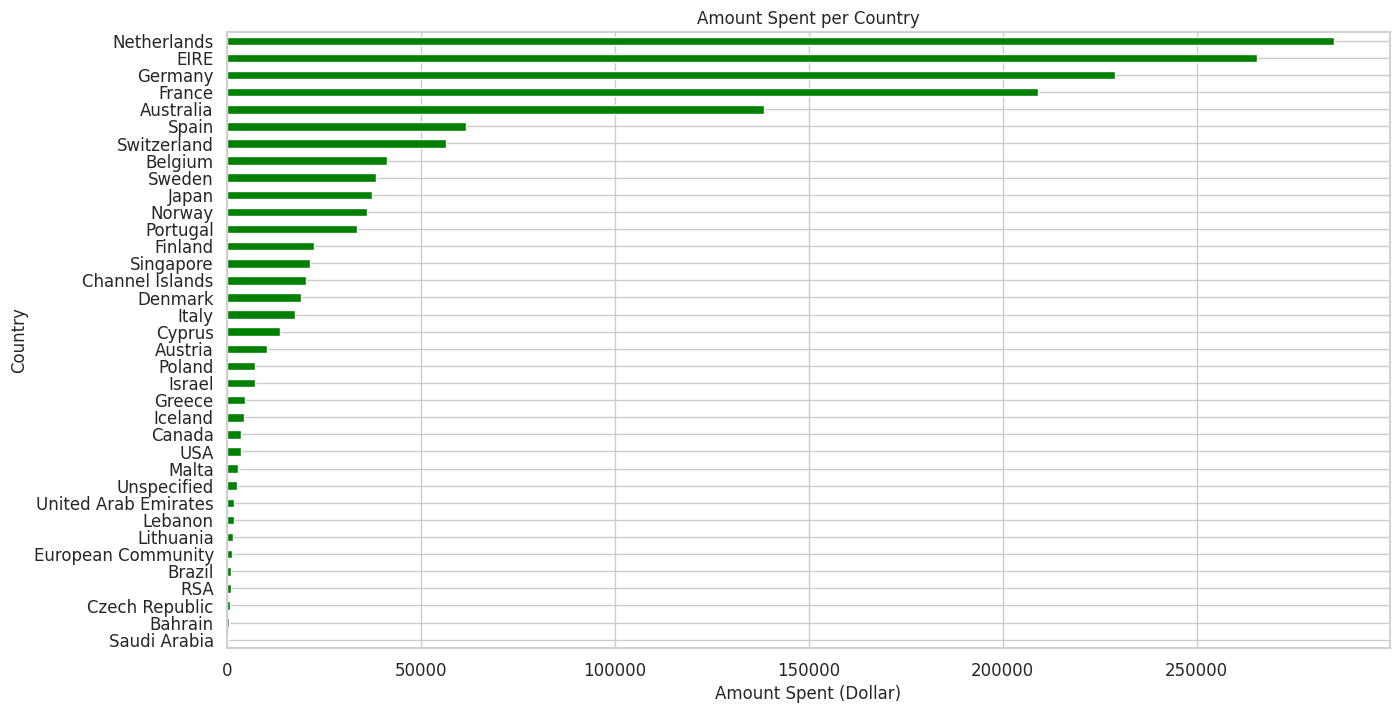

In [ ]:
# Amount spent by each country excluding the UK again
group_country_amount_spent = df2.groupby('Country')['AmountSpent'].sum().sort_values()
del group_country_amount_spent['United Kingdom']

# Plot the total amount of money spent per each country
plt.subplots(figsize=(15,8))
group_country_amount_spent.plot(kind='barh',fontsize=12, color='green')
plt.xlabel('Amount Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Amount Spent per Country', fontsize=12)

Netherlends is the biggest spender. Even though Germany is ahead in number of sales, Netherlands are the biggest spenders.

Now let's find our repeat customers.

# Repeat Customers

In [ ]:
# Get our range for our data
print('Date Range: %s to %s' % (df2['InvoiceDate'].min(), df2['InvoiceDate'].max()))

# Since our data ends on 11/20/2011, we're taking all the tranactions that happened before 12/2/11
df2 = df2.loc[df2['InvoiceDate'] < '2011-12-01']

Date Range: 2010-12-01 08:26:00 to 2011-12-09 12:50:00


In [ ]:
# Get total amount spent per invoice by CustomerID and Country (you can do either max or min)
invoice_customer_df = df2.groupby(by=['InvoiceNo', 'InvoiceDate']).agg({'AmountSpent': sum, 'CustomerID': max, 'Country': max}).reset_index()
invoice_customer_df.head()

,InvoiceNo,InvoiceDate,AmountSpent,CustomerID,Country
0,536365,2010-12-01 08:26:00,139.12,17850,United Kingdom
1,536366,2010-12-01 08:28:00,22.20,17850,United Kingdom
2,536367,2010-12-01 08:34:00,278.73,13047,United Kingdom
3,536368,2010-12-01 08:34:00,70.05,13047,United Kingdom
4,536369,2010-12-01 08:35:00,17.85,13047,United Kingdom


In [ ]:
# Sort on the amount spent, this gives us the largest amounts first
invoice_customer_df.sort_values(by='AmountSpent', ascending=False).head(10)

,InvoiceNo,InvoiceDate,AmountSpent,CustomerID,Country
1911,541431,2011-01-18 10:01:00,77183.60,12346,United Kingdom
7949,556444,2011-06-10 15:28:00,38970.00,15098,United Kingdom
12446,567423,2011-09-20 11:05:00,31698.16,17450,United Kingdom
8135,556917,2011-06-15 13:37:00,22775.93,12415,Australia
14487,572209,2011-10-21 12:08:00,22206.00,18102,United Kingdom
12438,567381,2011-09-20 10:12:00,22104.80,17450,United Kingdom
10869,563614,2011-08-18 08:51:00,21880.44,12415,Australia
5481,550461,2011-04-18 13:20:00,21535.90,15749,United Kingdom
14399,572035,2011-10-20 12:03:00,20277.92,14646,Netherlands
10637,563076,2011-08-11 16:12:00,19150.66,14646,Netherlands


In [ ]:
# How many repeat customers per month
# We set our index to our Invoice Date
# we use Grouper (freq=M) groups data by the index 'InvoiceDate' by month
# We then group this data by Customer ID and count how many of each customer made a purchase per month or count the number of distinct repeated customers per month 
# date is the month end date
# the filter function allows us to subet data by the rule in the lamda function i.e. those greater than 1 (repeat customers)
# Grouper allows you to group by per month in a cleaner way

monthly_repeat_customers_df = invoice_customer_df.set_index('InvoiceDate').groupby([
    pd.Grouper(freq='M'), 'CustomerID']).filter(lambda x:len(x) > 1).resample('M').nunique()['CustomerID']

monthly_repeat_customers_df

InvoiceDate
2010-12-31    263
2011-01-31    153
2011-02-28    153
2011-03-31    203
2011-04-30    170
2011-05-31    281
2011-06-30    220
2011-07-31    227
2011-08-31    198
2011-09-30    272
2011-10-31    324
2011-11-30    541
Freq: M, Name: CustomerID, dtype: int64

In [ ]:
# Number of Unique customers per month
monthly_unique_customers_df = df2.set_index('InvoiceDate')['CustomerID'].resample('M').nunique()
monthly_unique_customers_df

InvoiceDate
2010-12-31     885
2011-01-31     741
2011-02-28     758
2011-03-31     974
2011-04-30     856
2011-05-31    1056
2011-06-30     991
2011-07-31     949
2011-08-31     935
2011-09-30    1266
2011-10-31    1364
2011-11-30    1665
Freq: M, Name: CustomerID, dtype: int64

In [ ]:
# Ratio of repeat customers: multiply it by 100 to get the percent
monthly_repeat_percentage = monthly_repeat_customers_df/monthly_unique_customers_df*100.0
monthly_repeat_percentage

InvoiceDate
2010-12-31    29.717514
2011-01-31    20.647773
2011-02-28    20.184697
2011-03-31    20.841889
2011-04-30    19.859813
2011-05-31    26.609848
2011-06-30    22.199798
2011-07-31    23.919916
2011-08-31    21.176471
2011-09-30    21.484992
2011-10-31    23.753666
2011-11-30    32.492492
Freq: M, Name: CustomerID, dtype: float64

([<matplotlib.axis.XTick at 0x7f5f90e8f100>,
 [Text(0, 0, '12.2010'),
  Text(1, 0, '01.2011'),
  Text(2, 0, '02.2011'),
  Text(3, 0, '03.2011'),
  Text(4, 0, '04.2011'),
  Text(5, 0, '05.2011'),
  Text(6, 0, '06.2011'),
  Text(7, 0, '07.2011'),
  Text(8, 0, '08.2011'),
  Text(9, 0, '09.2011'),
  Text(10, 0, '10.2011'),
  Text(11, 0, '11.2011')])

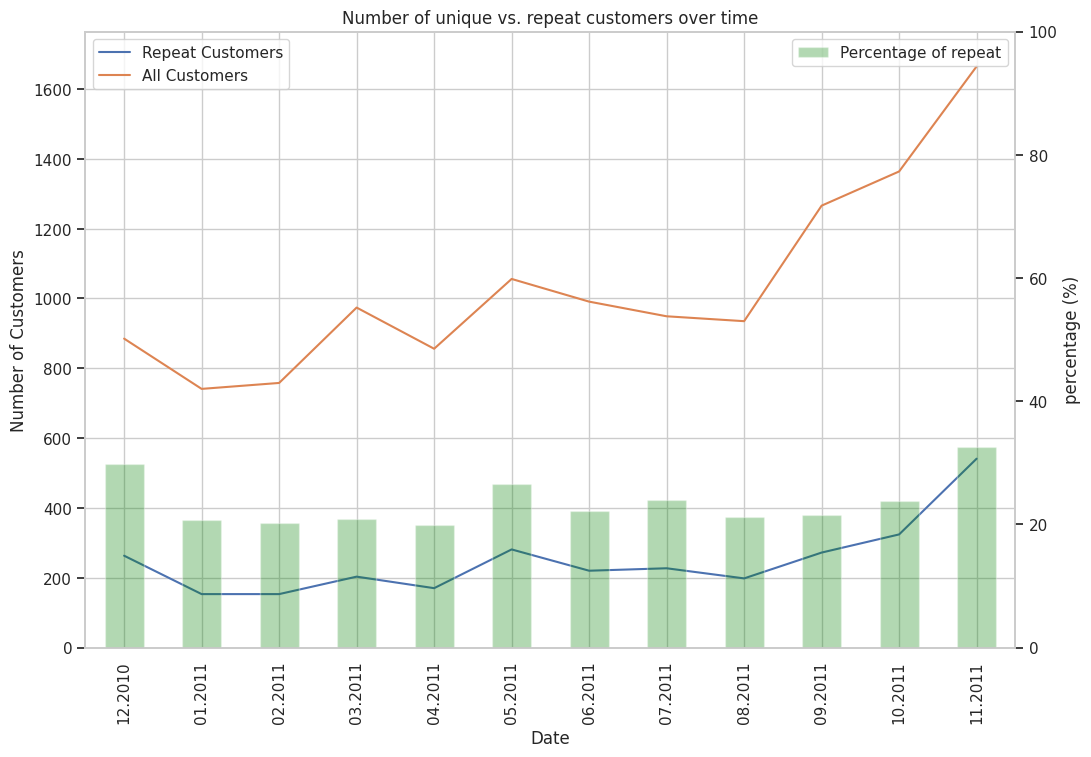

In [ ]:
# Plot this visually
# Note I'm using a 2 scale axis (left and right)
# I have two plots ax and ax2 and theyre going to be overlayed ontop of each other 
# So we have monthly repeat customers on the ax Y column
# Monthly repeat customers on the ax2 Y column which is the percent "monthly_repeat_percentage"

ax = pd.DataFrame(monthly_repeat_customers_df.values).plot(figsize=(12,8))

pd.DataFrame(monthly_unique_customers_df.values).plot(ax=ax, grid=True)

ax2 = pd.DataFrame(monthly_repeat_percentage.values).plot.bar(ax=ax, gid=True, secondary_y=True, color='green', alpha=0.3)

ax.set_xlabel('Date')
ax.set_ylabel('Number of Customers')
ax.set_title('Number of unique vs. repeat customers over time')

ax2.set_ylabel('percentage (%)')

ax.legend(['Repeat Customers', 'All Customers'])
ax2.legend(['Percentage of repeat'], loc='upper right')

ax.set_ylim([0, monthly_unique_customers_df.values.max()+100])
ax2.set_ylim([0, 100])

plt.xticks(range(len(monthly_repeat_customers_df.index)), [x.strftime('%m.%Y') for x in monthly_repeat_customers_df.index], rotation=45)

On the first Y axis on the left we see the range of number of customers. total number of customers in orange and number of repeat customers is the blue line. on the secondary Y axis is percent of repeat custoemer which is measured by the bar chart. What it tells us here is that how uniquecustomers chage over time we can see not too many repeat customers so these seem like good trends.

In [ ]:
# Lets investigate the relationship between revenue and repeat customers
monthly_revenue_df = df2.set_index('InvoiceDate')['AmountSpent'].resample('M').sum()

monthly_rev_repeat_customers_df = invoice_customer_df.set_index('InvoiceDate').groupby([
    pd.Grouper(freq='M'), 'CustomerID']).filter(lambda x: len(x) > 1).resample('M').sum()['AmountSpent']

# Let's get a percentage of the revenue from repeat customers to the overall monthly revenue
monthly_rev_perc__repeat_customers_df = monthly_rev_repeat_customers_df/monthly_revenue_df * 100.0
monthly_rev_perc__repeat_customers_df

InvoiceDate
2010-12-31    62.713792
2011-01-31    39.007101
2011-02-28    42.767478
2011-03-31    44.901787
2011-04-30    41.661132
2011-05-31    55.732401
2011-06-30    56.911595
2011-07-31    52.904475
2011-08-31    49.141899
2011-09-30    52.544416
2011-10-31    55.229144
2011-11-30    61.436148
Freq: M, Name: AmountSpent, dtype: float64

This code above calculates the percentage of monthly revenue that comes from repeat customers.

It first creates a DataFrame monthly_revenue_df by setting the 'InvoiceDate' column as the index of the 'df2' DataFrame and resampling it by month, summing the 'AmountSpent' column for each month.

Then it creates another DataFrame monthly_rev_repeat_customers_df by setting the 'InvoiceDate' column as the index of the 'invoice_customer_df' DataFrame and grouping it by month and 'CustomerID'. It filters the groups to only include those with more than one row (i.e. repeat customers), sums the 'AmountSpent' column for each month, and selects only the 'AmountSpent' column.

Finally, it creates a DataFrame monthly_rev_perc__repeat_customers_df by dividing monthly_rev_repeat_customers_df by monthly_revenue_df and multiplying by 100. This gives the percentage of revenue that comes from repeat customers for each month.

Overall, this code provides useful insights into the proportion of revenue that comes from repeat customers and how it varies over time. For example, we see 62% of our sales of the amount spent were spent by repeat customers.

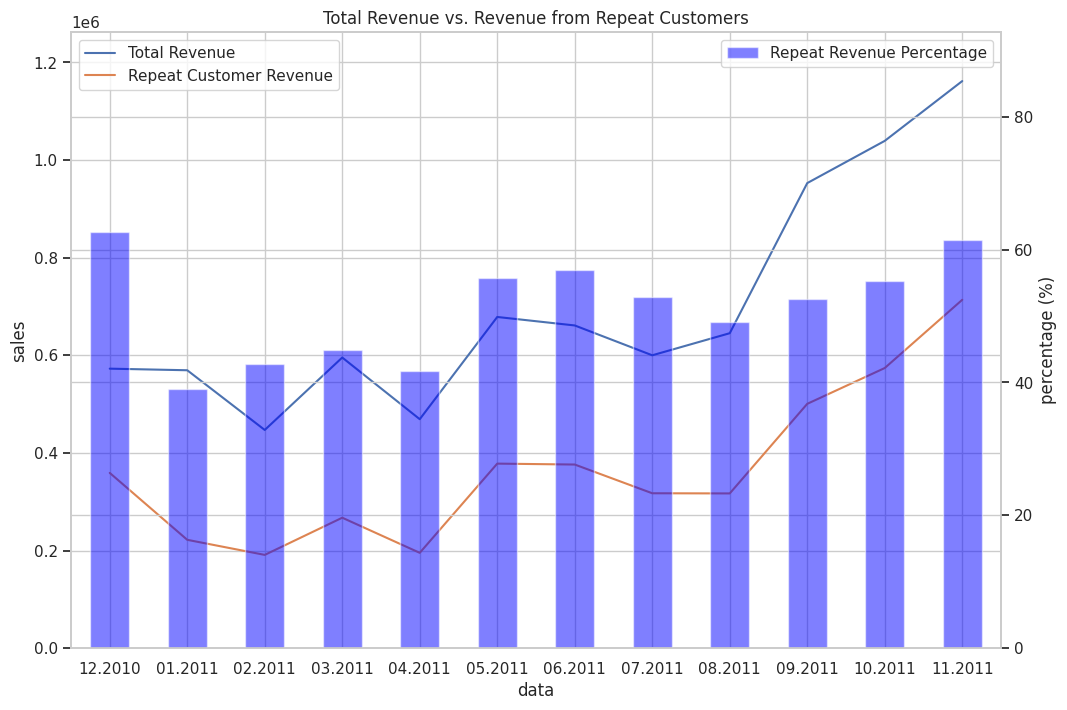

In [ ]:
# Plotting the percent of monthly revenue that comes from repeat customers
ax = pd.DataFrame(monthly_revenue_df.values).plot(figsize=(12,8))

pd.DataFrame(monthly_rev_repeat_customers_df.values).plot(ax=ax,grid=True,)

ax.set_xlabel('data')
ax.set_ylabel('sales')
ax.set_title('Total Revenue vs. Revenue from Repeat Customers')

ax.legend(['Total Revenue', 'Repeat Customer Revenue'])

ax.set_ylim([0, max(monthly_revenue_df.values)+100000])

ax2 = ax.twinx()

pd.DataFrame(monthly_rev_perc__repeat_customers_df.values).plot(ax=ax2,kind='bar', color='blue',alpha=0.5)

ax2.set_ylim([0, max(monthly_rev_perc__repeat_customers_df.values)+30])
ax2.set_ylabel('percentage (%)')
ax2.legend(['Repeat Revenue Percentage'])

ax2.set_xticklabels([x.strftime('%m.%Y') for x in monthly_rev_perc__repeat_customers_df.index])

plt.show()

A very high percentage of the revenue comes from repeat customers. the trend seems like it gets higher and higher as time goes by.

# Item Trends

Counting the number of items sold for each product for each period.

In [ ]:
# Get quantity of each item sold per month
date_item_df = df2.set_index('InvoiceDate').groupby([pd.Grouper(freq='M'), 'StockCode'])['Quantity'].sum()

date_item_df.head(15)

InvoiceDate  StockCode
2010-12-31   10002        224
             10120         16
             10123C         1
             10124A         4
             10124G         5
             10125        143
             10133        123
             10135        366
             11001         65
             15034         38
             15036        132
             15039         17
             15044A         6
             15044B         2
             15044C         7
Name: Quantity, dtype: int64

For each month, for each item, how many of them were sold. Its a large dataframe with every ite in every month. So I find items that I want to track, specifically a certain month.

In [ ]:
# Rank items by the last month's sales
last_month_sorted_df = date_item_df.loc['2011-11-30']
last_month_sorted_df = last_month_sorted_df.reset_index()
last_month_sorted_df.sort_values(by='Quantity', ascending=False).head(10)

,StockCode,Quantity
2371,84826,12551
1567,23084,12393
827,22197,8458
738,22086,5919
2488,85099B,5678
2385,84879,5190
1135,22578,4981
2498,85123A,4861
1134,22577,4582
2278,84077,4500


In [ ]:
# Let's look at the top 5 items sale per month

date_item_df = df.loc[df['StockCode'].isin(['23084', '84826', '22197', '22086', '85099B'])].set_index('InvoiceDate').groupby([
    pd.Grouper(freq='M'), 'StockCode'])['Quantity'].sum()

date_item_df

InvoiceDate  StockCode
2010-12-31   22086         2453
             22197         2731
             84826          306
             85099B        2126
2011-01-31   22086           24
             22197         1809
             84826          480
             85099B        2639
2011-02-28   22086            5
             22197         2663
             84826           66
             85099B        3078
2011-03-31   22086           87
             22197         2798
             84826           60
             85099B        5281
2011-04-30   22086          -27
             22197         1856
             84826            1
             85099B        2452
2011-05-31   22086           17
             22197         6848
             23084         1131
             85099B        3617
2011-06-30   22086          344
             22197         2092
             23084         1693
             84826            4
             85099B        3676
2011-07-31   22086          377
             2219

 We see some negative values, maybe soething was returned. A lot of POS will use the same invoice number to generate an item.

In [ ]:
# Generate a monthly trend of each of the top 5 items
trending_items_df = date_item_df.reset_index().pivot('InvoiceDate', 'StockCode').fillna(0)

trending_items_df = trending_items_df.reset_index()
trending_items_df = trending_items_df.set_index('InvoiceDate')
trending_items_df.columns = trending_items_df.columns.droplevel(0)
trending_items_df

StockCode,22086,22197,23084,84826,85099B
InvoiceDate,,,,,
2010-12-31,2453.0,2731.0,0.0,306.0,2126.0
2011-01-31,24.0,1809.0,0.0,480.0,2639.0
2011-02-28,5.0,2663.0,0.0,66.0,3078.0
2011-03-31,87.0,2798.0,0.0,60.0,5281.0
2011-04-30,-27.0,1856.0,0.0,1.0,2452.0
2011-05-31,17.0,6848.0,1131.0,0.0,3617.0
2011-06-30,344.0,2092.0,1693.0,4.0,3676.0
2011-07-31,377.0,1862.0,318.0,2.0,3126.0
2011-08-31,370.0,5416.0,1783.0,72.0,5401.0


I'm taking the data I created before and pivoting it on InvoiceDate and StockCode. It's giving us the sales per month for each item.

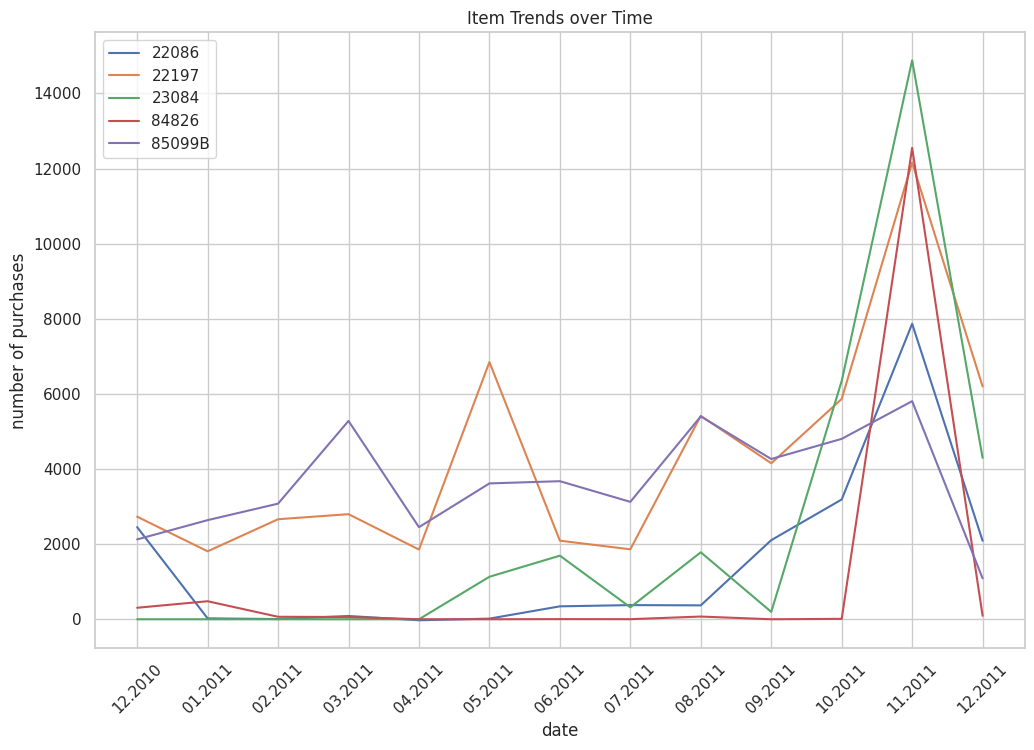

In [ ]:
# Plot the above code
ax = pd.DataFrame(trending_items_df.values).plot(figsize=(12,8), grid=True,)

ax.set_ylabel('number of purchases')
ax.set_xlabel('date')
ax.set_title('Item Trends over Time')

ax.legend(trending_items_df.columns, loc='upper left')

plt.xticks(range(len(trending_items_df.index)), [x.strftime('%m.%Y') for x in trending_items_df.index], rotation=45)

plt.show()

A couple of items go down to zero even though they were top sellers then all of them spiked last month. Or maybe those items were seasonal items and they were not in stock. 